In [1]:
import numpy as np
import pandas as pd


In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import tree


In [36]:
df=pd.read_csv("D:/winequality.csv")

In [37]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [38]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


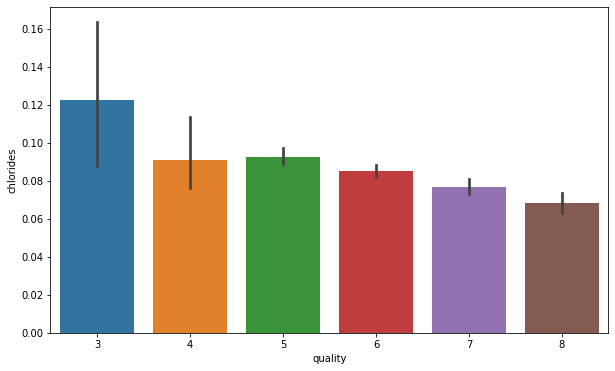

In [45]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='chlorides',data=df)

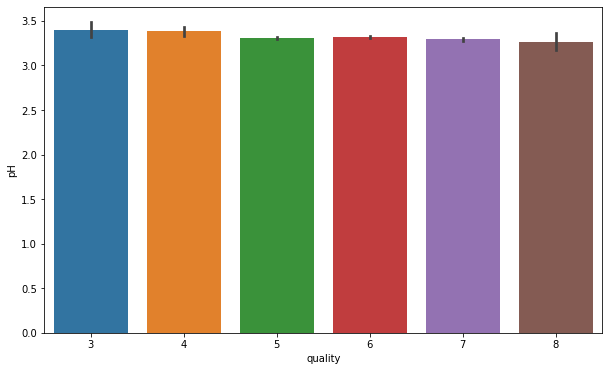

In [46]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='pH',data=df)

In [34]:
features = ['fixed acidity','volatile acidity','citric acid'
            ,'residual sugar','chlorides','free sulfur dioxide',
          'total sulfur dioxide','density','pH','sulphates','alcohol']

x = df[features]
y = df['quality']

sns.pairplot(df,x_vars=features,y_vars='quality',kind='reg',size=7,aspect=0.5)

TypeError: list indices must be integers or slices, not list

In [49]:
y = df.quality
X = df.drop('quality', axis=1)
#x side will have everything excpt quality
# axis=1 is used in drop function to remove 1 side


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [53]:
print(X_train.head())

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
642             9.9             0.540         0.45             2.3      0.071   
907             6.1             0.560         0.00             2.2      0.079   
1141            8.2             0.380         0.32             2.5      0.080   
595             8.9             0.595         0.41             7.9      0.086   
623             7.9             0.510         0.25             2.9      0.077   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
642                  16.0                  40.0  0.99910  3.39       0.62   
907                   6.0                   9.0  0.99480  3.59       0.54   
1141                 24.0                  71.0  0.99624  3.27       0.85   
595                  30.0                 109.0  0.99980  3.27       0.57   
623                  21.0                  45.0  0.99740  3.49       0.96   

      alcohol  
642       9.4  
907      11.5  
11

In [55]:
#After we obtained the data we will be using, the next step is data normalization. 
#It is part of pre-processing in which data is converted to fit in a range of -1 and 1. 
#These are simply, the values which are understood by a machine learning algorithm easily.

X_train_scaled = preprocessing.scale(X_train)
print( X_train_scaled)

[[ 0.90489205  0.06456027  0.9147987  ...  0.51247434 -0.20660948
  -0.96293869]
 [-1.27403995  0.17640935 -1.39821976 ...  1.81066148 -0.71078984
   1.02794502]
 [-0.06989332 -0.83023237  0.24659337 ... -0.26643794  1.24290904
   0.55392509]
 ...
 [ 4.17329004  0.8754661   2.50821142 ... -2.34353736  0.17152578
   0.74353306]
 [-0.64329647 -0.83023237  0.14379255 ...  0.70720241 -0.39567712
  -0.8681347 ]
 [ 0.56085016  1.04323972 -0.16460991 ... -1.24007829 -0.39567712
  -0.48891876]]


In [56]:
#Time has now come for the most exciting step, training our algorithm so that it can predict the wine quality.
#We do so by importing a DecisionTreeClassifier() and using fit() to train it.

clf=tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [57]:
#The next step is to check how efficiently your algorithm is predicting the label (in this case wine quality).
#This can be done using the score() function.

confidence = clf.score(X_test, y_test)

print(confidence)


0.6125


In [58]:
#Now we are almost at the end of our program, with only two steps left. First of which is the prediction of data.
#Now that we have trained our classifier with features, we obtain the labels using predict() function.

y_pred = clf.predict(X_test)

In [60]:
#Our predicted information is stored in y_pred but it has far too many columns to compare it with the expected labels we stored in y_test . 
#So we will just take first five entries of both, print them and compare them.

#converting the numpy array to list
x=np.array(y_pred).tolist()

#printing first 5 predictions

for i in range(0,5):
    print (x[i])
    
#printing first five expectations

print( y_test.head())

6
5
8
5
6
941     7
163     5
1524    6
827     5
384     5
Name: quality, dtype: int64
